<a href="https://colab.research.google.com/github/Hinduntw/iris-classification-knn/blob/main/Iris_Flower_Classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  Import Libraries and Load Dataset

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Data Preprocessing (Feature Normalization)

In [14]:
# Normalizing features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])  # Excluding 'species' column
df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)
df_scaled['species'] = df['species']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


3. Exploratory Data Analysis (EDA)

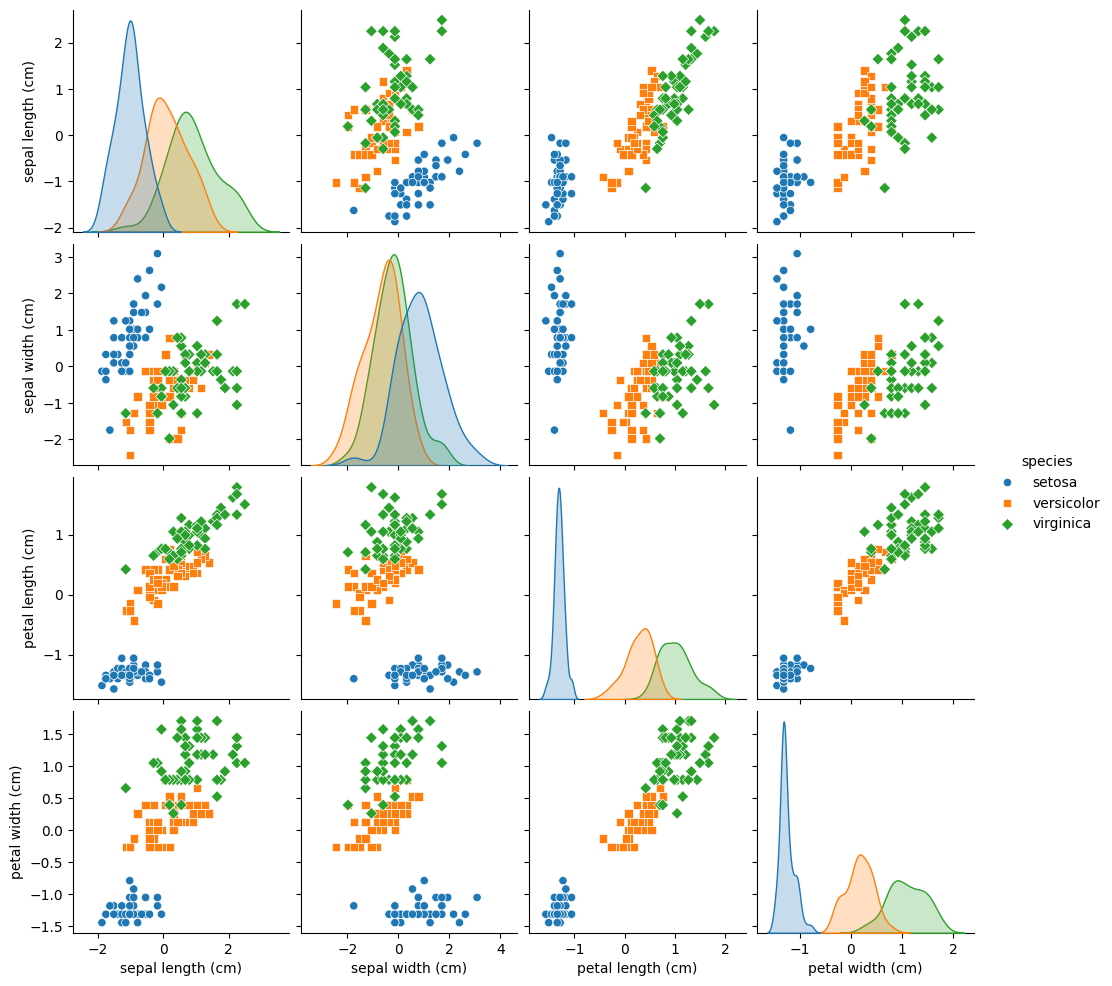

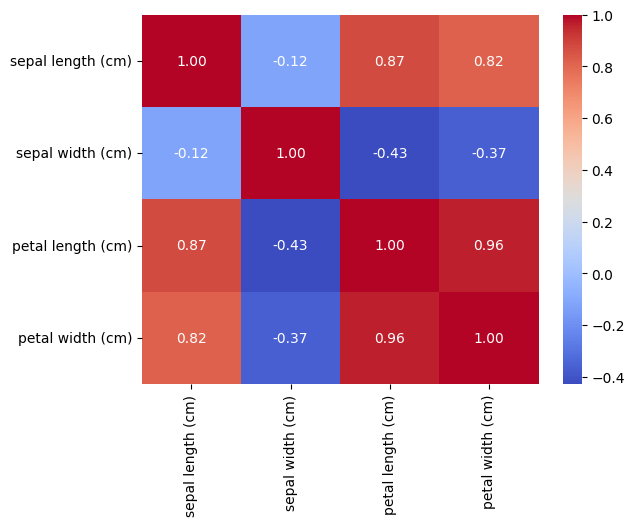

In [15]:
# Pairplot to visualize relationships between features
sns.pairplot(df_scaled, hue='species', markers=["o", "s", "D"])
plt.show()

# Heatmap to show correlation between features
sns.heatmap(df_scaled.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

4. Split Dataset into Training and Test Sets

In [16]:
# Splitting the dataset into features (X) and target (y)
X = df_scaled.iloc[:, :-1]  # Features
y = df_scaled['species']     # Target

# Splitting dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the resulting datasets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (105, 4), Test set shape: (45, 4)


5. Model Building: K-Nearest Neighbors (KNN)

In [17]:
# Creating a KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model on the training data
knn.fit(X_train, y_train)

# Predicting flower species for the test data
y_pred = knn.predict(X_test)

# Print the first few predictions to verify the output
print(f"Predictions: {y_pred[:10]}")  # Print first 10 predictions

Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


6. Model Evaluation

Akurasi: 100%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:


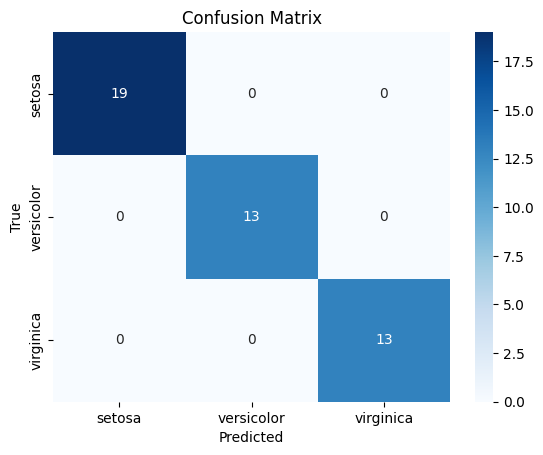

In [20]:
# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {round(accuracy * 100)}%")

# Displaying classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Displaying confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

7. Comparing Error Rate with the K Value

Text(0, 0.5, 'Mean Error')

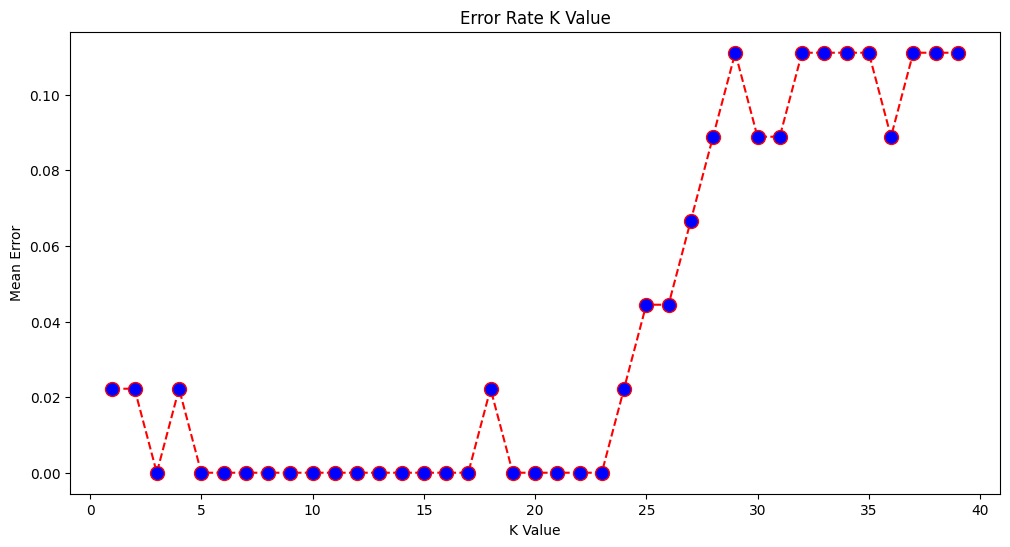

In [23]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')